In [15]:
#参考 https://qiita.com/ta-ka/items/e6fd0b6fc46dbab4a651

X:  [[-1.04128389 -0.91728934]
 [-1.69467464  0.93075377]
 [-1.83178414 -0.43529312]
 [-0.46066335 -0.5305866 ]
 [ 1.35585157  1.01883487]
 [ 0.7581942   1.23958547]
 [ 0.33219155  0.15205069]
 [-0.08317911 -1.20641306]
 [ 1.37932174 -0.10356466]
 [-0.73926871  0.23599319]
 [-0.7538396   0.57541326]
 [-0.59523778  0.3158883 ]
 [ 0.99908806  0.85091177]
 [ 1.07087046  0.62189512]
 [-0.70946319  0.57212674]
 [ 0.27357455 -1.33549414]
 [-1.11897432  0.02604673]
 [-0.99405008  1.03387128]
 [ 0.5051842  -0.12978384]
 [ 0.45021778  0.9203897 ]
 [ 1.04813426  0.07512104]
 [-1.3657412  -0.5954579 ]
 [-0.90055871  1.02753793]
 [-0.88263763 -0.63057018]
 [ 0.10111706 -0.25283556]
 [-0.97619728 -1.21977711]
 [ 2.46655368  1.29582803]
 [-0.63922157  1.63688684]
 [-1.11563283 -0.58690958]
 [-0.37237191 -1.46362729]
 [ 0.97784331 -0.30849879]
 [ 0.6761969   0.84726516]
 [ 0.03742658  0.98446354]
 [ 1.39038473 -1.47731424]
 [-0.94139734 -0.71065575]
 [ 0.54777321  0.74752633]
 [ 0.29579034 -1.2586750

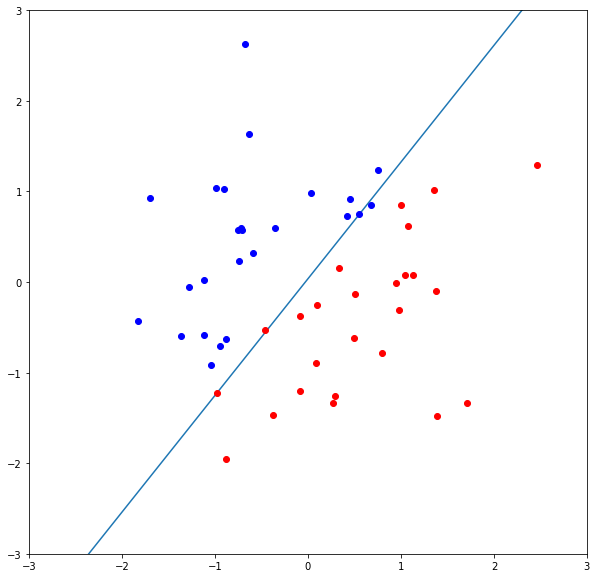

In [24]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def f(x1, x2):
    return x1 - x2

N = 50
X = numpy.random.randn(N, 2)
print("X: ", X)

y = []

for i in range(X.shape[0]):
    if f(X[i][0], X[i][1]) > 0: 
        y.append(1)
    else: 
        y.append(-1)

y = numpy.array(y)
print("y: ", y)

alpha = numpy.zeros(N)
beta = 1.0 #制約条件にかけるペナルティ値
gamma1 = 0.0001 #漸近的にalpfaを求める際の係数
gamma2 = 0.1 #漸近的にbetaを求める際の係数
repeat = 100

#本ではcvxoptパッケージで最適化しているが、下では漸近的に近似解を求める

for j in range(repeat):
    for i in range(N):
        delta = 1 - (y[i] * X[i]).dot(alpha * y * X.T).sum() - beta * y[i] * alpha.dot(y)
        alpha[i] = alpha[i] + gamma1 * delta
    for i in range(N):
        beta = beta + 0.5 * gamma2 * alpha.dot(y) ** 2

print('alpha: ', alpha)
print('beta: ', alpha)

#index = alpha > 0
w = (alpha * y).T.dot(X)
b = (y - X.dot(w)).mean() #サイトではy, Xに[index]としていた

seq = numpy.arange(-3, 3, 0.1)
plt.figure(figsize = (10, 10))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(seq, -(w[0] * seq + b) / w[1])
plt.plot(X[y ==  1, 0], X[y ==  1, 1], 'ro') #X[y ==  1, 0]はy=1のもののX[0]番という意味
plt.plot(X[y == -1, 0], X[y == -1, 1], 'bo')
